## Projeto WPT (WIRELESS POWER TRANSFER WIRELESS POWER TRANSFER )

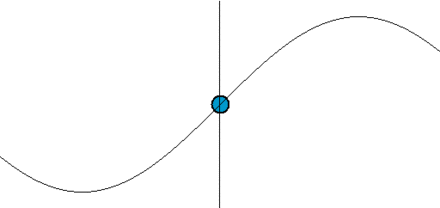

# <h1 style="color:purple"> Objetivo

O projeto WPT (WIRELESS POWER TRANSFER) consiste em um mecanismo de transmiss√£o de energia sem fio por interm√©dio do eletromagnetismo e ondulat√≥ria.


In [88]:
#Importando Bibliotecas 
from cmath import *
from numpy import linalg
import matplotlib.pyplot as plt
import numpy as np

## <li style="color:purple"> Etapa 1
### Atividade 1

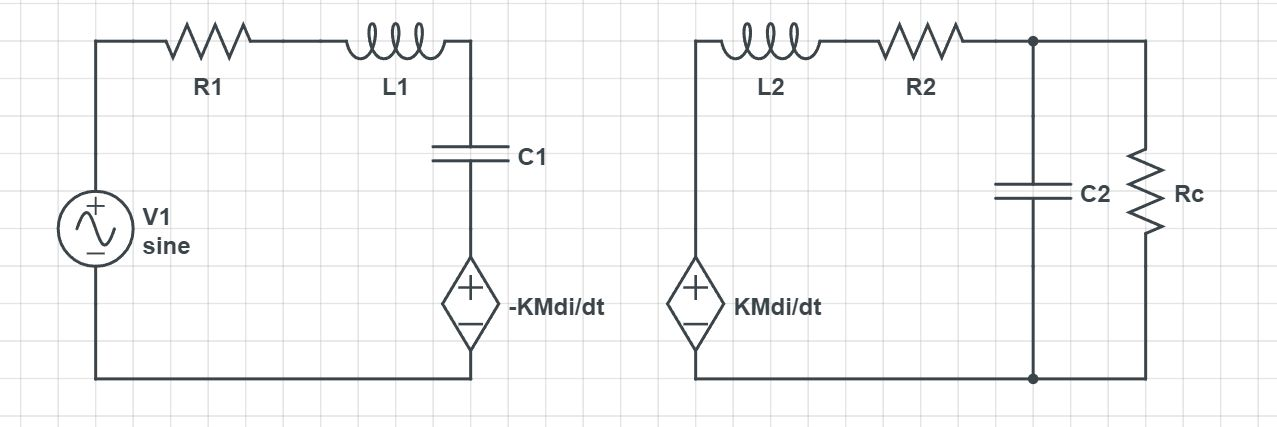

Circuito com um capacitor em s√©rie no prim√°rio e um em paralelo no secund√°rio 

In [89]:
#Fun√ß√£o para as correntes no transformador agora com o capacitor em s√©rie no prim√°rio e em paralelo no secund√°rio
def CalcularTransformador(Uf, Rc,R1,R2, XC1, XC2, XL1, XL2, XM):
    Z=np.array([[R1+XL1+XC1, -XM],[XM, -XL2-R2-(1/(1/XC2+1/Rc))]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    return i[0], i[1]

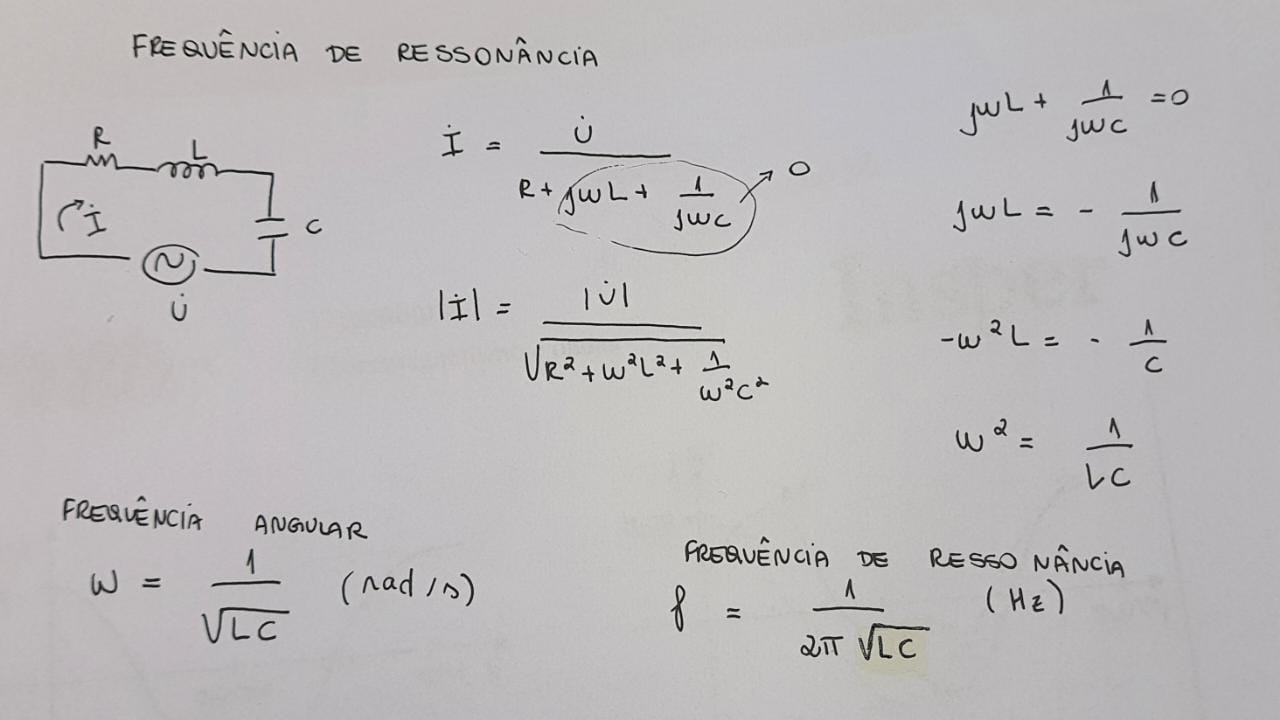

In [90]:
#fun√ß√£o de resson√¢ncia 
def Reso(L1, L2, C1, C2): 
    Reso1=1/(2*pi*sqrt(L1*C1))
    Reso2=1/(2*pi*sqrt(L2*C2))
    return Reso1, Reso2



### Atividade 2

Criando Fun√ß√µes de Opera√ß√£o 

In [91]:
#fun√ß√£o de Indut√¢ncia m√∫tua 
def M(k,L1, L2): 
    return k*sqrt(L1*L2)

In [92]:
#Defini√ß√£o de Dados Iniciais do TRANSFORMADOR 
Uf=5
C1=0.1e-6
C2=0.1e-6
L1=196e-6
L2=196e-6
R1=0.5
R2=0.5
K=1
f=60 #frequencia
w=2*pi*f#calculando a frequencia angular
Rc=300

In [93]:
XC1=1/(1j*w*C1) #Capacit√¢ncia 1
XC2=1/(1j*w*C2) #Capacit√¢ncia 2 
XL1=1j*w*L1 #Indut√¢ncia 1
XL2=1J*w*L2 #Indut√¢ncia 2 
XM=1j*w*M(K,L1,L2)# Indut√¢ncia M√∫tua


print('A indut√¢ncia M√∫tua √©', abs(M(K,L1,L2)),)
print("A frequ√™ncia de resson√¢ncia √© {:.0f} Hz!".format(abs(Reso(L1,L2,C1,C2)[0])))
print('A corrente i1 √© {} A'.format(abs(CalcularTransformador(Uf, Rc,R1,R2, XC1, XC2, XL1, XL2, XM)[0])))
print('A corrente i2 √© {} A'.format(abs(CalcularTransformador(Uf, Rc,R1,R2, XC1, XC2, XL1, XL2, XM)[1])))


A indut√¢ncia M√∫tua √© 0.000196
A frequ√™ncia de resson√¢ncia √© 35949 Hz!
A corrente i1 √© 0.00018849608425747854 A
A corrente i2 √© 4.6352590725565e-08 A


### Atividade 3 e 4

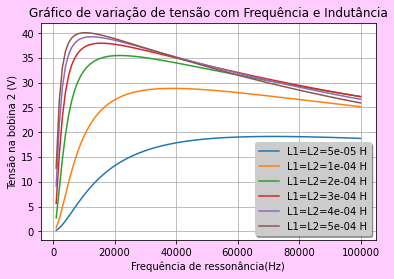

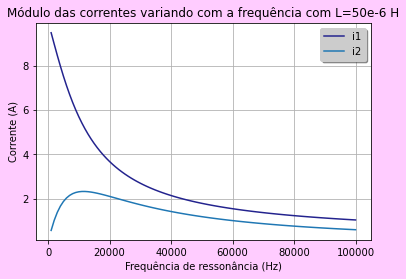

In [94]:
K_2=0.1
Rc_2=400 #valor de resist√™ncia do componente que se quer alimentar 

list_indutancias=[50e-6, 100e-6, 200e-6, 300e-6, 400e-6, 500e-6]
lista_frequencias=np.linspace(1e3, 100e3, 100)

lista_i1=[]
lista_i2=[]
plt.figure(facecolor="#FFCCFF")
for L in list_indutancias: 
    L1_2=L #Indutor no prim√°rio 
    L2_2=L #Indutor no secund√°rio 
    lista_Ufs=[]
    for freq in lista_frequencias: 
        w_2=2*pi*freq #frequencia angular vari√°vel 
        #recalculando com base em cada valor da lista de frequ√™ncias 
        C1_2=1/(L1_2*w_2**2) #Capacitor no prim√°rio 
        C2_2=1/(L2_2*w_2**2) #Capacitor no secund√°rio
        R1_2=0.5+0.5*5*freq/100e3 #Resistor no prim√°rio 
        R2_2=0.5+0.5*5*freq/100e3 #Resistor no secund√°rio
        XC1_2=1/(1j*w_2*C1_2) #Capacit√¢ncia 1
        XC2_2=1/(1j*w_2*C2_2)#Capacit√¢ncia 2
        XL1_2=1j*w_2*L1_2 #Indut√¢ncia 1
        XL2_2=1J*w_2*L2_2 #Indut√£ncia 2
        XM_2=1j*w_2*M(K_2,L1_2,L2_2) #Indut√¢ncia M√∫tua
        i1,i2=CalcularTransformador(5, Rc_2,R1_2,R2_2, XC1_2, XC2_2, XL1_2, XL2_2, XM_2) #correntes no prim√°rio e no secund√°rio
        Resistencia_equivalente=1/(1/Rc_2+1/XC2_2) 
        Vsaida=Resistencia_equivalente*i2  #tens√£o de sa√≠da no secund√°rio 
        lista_Ufs.append(abs(Vsaida)) #lista com os valores de tens√£o no secund√°rio
        if L==50e-6: 
            lista_i1.append(abs(i1))
            lista_i2.append(abs(i2))
    
    plt.plot(lista_frequencias,lista_Ufs, label="L1=L2=%.0e H" %L)

    


plt.xlabel("Frequ√™ncia de resson√¢ncia(Hz)")
#ax=plt.axes()
#ax.set_facecolor("#CDCDCD")
plt.ylabel("Tens√£o na bobina 2 (V)")
plt.title("Gr√°fico de varia√ß√£o de tens√£o com Frequ√™ncia e Indut√¢ncia")
plt.legend(loc='lower right', facecolor="#CCCCCC",shadow=True)
plt.grid()
plt.show()


plt.figure(facecolor="#FFCCFF")
plt.plot(lista_frequencias, lista_i1, label='i1', color='#23238E')
plt.plot(lista_frequencias, lista_i2, label='i2')
plt.title("M√≥dulo das correntes variando com a frequ√™ncia com L=50e-6 H")
plt.xlabel("Frequ√™ncia de resson√¢ncia (Hz)")
plt.ylabel("Corrente (A)")
plt.legend(loc='upper right', facecolor="#CCCCCC",shadow=True)
plt.grid(True)
plt.show()
        

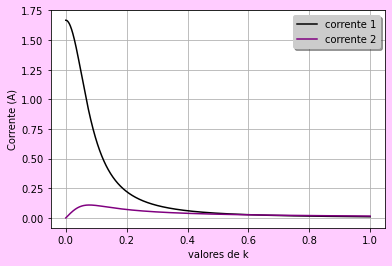

In [95]:
#considerando uma dada frequencia e indutancia fixas
f=100e3 #Hz
L=50e-6
w_2=2*pi*freq #frequencia angular vari√°vel 
#recalculando com base em cada valor da lista de frequ√™ncias 
C1_2=1/(L1_2*w_2**2) #Capacitor no prim√°rio 
C2_2=1/(L2_2*w_2**2) #Capacitor no secund√°rio
R1_2=0.5+0.5*5*freq/100e3 #Resistor no prim√°rio 
R2_2=0.5+0.5*5*freq/100e3 #Resistor no secund√°rio
XC1_2=1/(1j*w_2*C1_2) #Capacit√¢ncia 1
XC2_2=1/(1j*w_2*C2_2)#Capacit√¢ncia 2
XL1_2=1j*w_2*L1_2 #Indut√¢ncia 1
XL2_2=1J*w_2*L2_2 #Indut√£ncia 2

lista_ks=np.linspace(0,1,1000)

lista_i1=[]
lista_i2=[]
for k_2 in lista_ks:
    
    XM_3=1j*w_2*M(k_2,L1_2,L2_2) #Indut√¢ncia M√∫tua
    i1,i2=CalcularTransformador(5, Rc_2,R1_2,R2_2, XC1_2, XC2_2, XL1_2, XL2_2, XM_3)
    lista_i1.append(abs(i1))
    lista_i2.append(abs(i2))
plt.figure(facecolor="#FFCCFF")
plt.plot(lista_ks, lista_i1, label='corrente 1', color='black')
plt.plot(lista_ks, lista_i2, label='corrente 2', color='purple')
plt.xlabel('valores de k')
plt.ylabel('Corrente (A)')
plt.legend(loc='upper right', facecolor="#CCCCCC",shadow=True)
plt.grid(True)
    
        





### Atividade 5


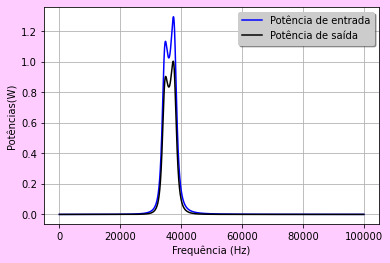

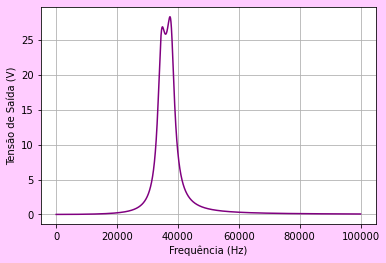

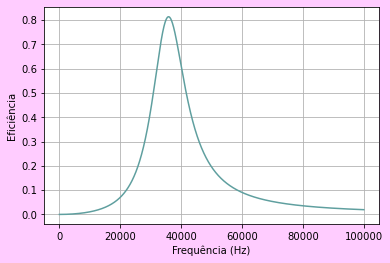

In [105]:
V1=10/pi
k_3=0.11
Rc=400

lista_V2_saida=[]
lista_potencia_entrada=[]
lista_potencia_saida=[]
lista_eficiencia=[]

lista_freq=np.arange(10,100000, 10)

for freq in lista_freq: 
    R1=R2=0.5
    w_3=2*pi*freq
    C1_3=C2_3=0.1e-6
    L1_3=L2_3=196e-6
    XC1_3=1/(1j*w_3*C1)
    XC2_3=1/(1j*w_3*C2)
    XL1_3= 1j*w_3*L1_3
    XL2_3=1j*w_3*L2_3
    XM_3=1j*w_3*M(k_3,L1_3,L2_3)    
    i1_3, i2_3=CalcularTransformador(V1, Rc,R1,R2, XC1_3, XC2_3, XL1_3, XL2_3, XM_3) 
    Sprima=V1/sqrt(2)*i1_3.conjugate()/sqrt(2)
    #print(Sprima)
    lista_potencia_entrada.append(Sprima.real)
    Zeq=1/(1/XC2_3+1/Rc)
    V2_saida=Zeq*i2_3
    #print(V2_saida)
    lista_V2_saida.append(abs(V2_saida))
    Ic=V2_saida/Rc
    S_secun=V2_saida/sqrt(2)*(Ic.conjugate()/sqrt(2))
    #print(S_secun)
    lista_potencia_saida.append(S_secun.real)
    lista_eficiencia.append(S_secun.real/Sprima.real)
plt.figure(facecolor="#FFCCFF")   
plt.plot(lista_freq, lista_potencia_entrada, label='Pot√™ncia de entrada', color='blue')
plt.plot(lista_freq, lista_potencia_saida, label='Pot√™ncia de sa√≠da', color='black')
plt.title('')
plt.xlabel('Frequ√™ncia (Hz)')
plt.legend(loc='upper right', facecolor="#CCCCCC",shadow=True)
plt.ylabel('Pot√™ncias(W)')
plt.grid(True)
plt.show()

plt.figure(facecolor="#FFCCFF")
plt.plot(lista_freq, lista_V2_saida, color='purple')
plt.title('')
plt.xlabel('Frequ√™ncia (Hz)')
plt.ylabel('Tens√£o de Sa√≠da (V)')
plt.grid(True)
plt.show()

plt.figure(facecolor="#FFCCFF")
plt.plot(lista_freq, lista_eficiencia, color="#5F9F9F")
plt.title('')
plt.xlabel('Frequ√™ncia (Hz)')
plt.ylabel('Efici√™ncia')
plt.grid(True)
plt.show()

Constru√ß√£o de um gr√°fico que relacione o valor de pico da tens√£o no secund√°rio (no resistor ùëÖùê∂) com 
o coeficiente de acoplamento ùëò: para essa atividade, use a frequ√™ncia de resson√¢ncia natural do 
conjunto ùêøùê∂, que ficar√° fixa para diferentes valores de ùëò. A ideia, com a simula√ß√£o, √© identificar se existe 
um fator de acoplamento √≥timo, com o qual a tens√£o no secund√°rio √© m√°xima (e, por conseguinte, a 
pot√™ncia recebida tamb√©m ser√° m√°xima).

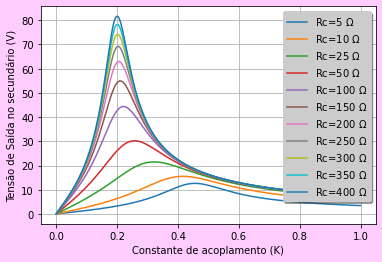

In [106]:
lista_ks=np.linspace(0,1,1000)

lista_resistencia_carga=[5,10,25,50,100,150,200,250,300,350,400]

freq=30e3
w_3=2*pi*freq
R1_3=0.4
R2_3=0.417
        
C1_3=C2_3=0.47e-6
L1_3=77e-6
L2_3=72.16e-6
XC1_3=1/(1j*w_3*C1_3)
XC2_3=1/(1j*w_3*C2_3)
XL1_3= 1j*w_3*L1_3
XL2_3=1j*w_3*L2_3
#lista_picos=[]
V1=27.3/pi
plt.figure(facecolor="#FFCCFF")
for Rc in lista_resistencia_carga:
    lista_picos=[]
    lista_value_max=[]
    for k_3 in lista_ks:
        XM_3=1j*w_3*M(k_3,L1_3,L2_3)    
        i1_3, i2_3=CalcularTransformador(V1, Rc,R1_3,R2_3, XC1_3, XC2_3, XL1_3, XL2_3, XM_3) 
        Zeq=1/(1/XC2_3+1/Rc)
        V2_saida=Zeq*i2_3
        lista_picos.append(abs(V2_saida))
        
    plt.plot(lista_ks, lista_picos, label="Rc=%0.f $\Omega$" %Rc)

plt.xlabel('Constante de acoplamento (K)')
plt.ylabel('Tens√£o de Sa√≠da no secund√°rio (V)')
plt.legend(loc='upper right', facecolor="#CCCCCC",shadow=True)
plt.grid(True)
plt.show()


In [107]:
#fun√ß√£o para encontrar o k onde ocorre Vp
def kcomVp(l_k,lista_V2_saida):
    c=0
    Vp=max(lista_V2_saida)
    for n in range(0,len(lista_V2_saida)):
        if lista_V2_saida[n]>=Vp-0.001:
            c=n
            break
    return l_k[c]

